<a href="https://colab.research.google.com/github/Muhliscm/IBM_professional_data_analyst_certification/blob/main/M3ExploratoryDataAnalysis_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [33]:
import pandas as pd

Load the dataset into a dataframe.


In [34]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


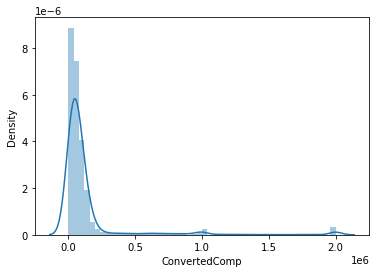

In [36]:
# your code goes here
sns.distplot(df['ConvertedComp'])

Plot the histogram for the column `ConvertedComp`.


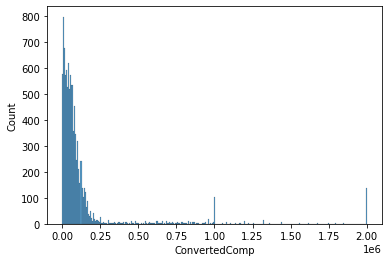

In [37]:
# your code goes here
sns.histplot(df['ConvertedComp'])

What is the median of the column `ConvertedComp`?


In [38]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [39]:
len(df[df['Gender'] == 'Man'])

10480

In [40]:
# your code goes here


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [41]:
# your code goes here
len(df[df['Gender'] == 'Woman'])

731

In [42]:
df['Gender'].tolist().count('Woman')

731

In [43]:
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [44]:
# your code goes here min,q1,median,q3,max
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [45]:
df['Age'].mean()

30.778894788947888

In [46]:
df['Age'].median()

29.0

In [47]:
df['Age'].quantile(.25)

25.0

In [48]:
df['Age'].quantile(.75)

35.0

In [49]:
df['Age'].max()

99.0

Plot a histogram of the column `Age`.


(array([2.250e+02, 1.869e+03, 2.969e+03, 2.368e+03, 1.579e+03, 9.780e+02,
        5.780e+02, 2.640e+02, 1.590e+02, 6.600e+01, 3.500e+01, 1.400e+01,
        3.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([16.  , 20.15, 24.3 , 28.45, 32.6 , 36.75, 40.9 , 45.05, 49.2 ,
        53.35, 57.5 , 61.65, 65.8 , 69.95, 74.1 , 78.25, 82.4 , 86.55,
        90.7 , 94.85, 99.  ]),
 <a list of 20 Patch objects>)

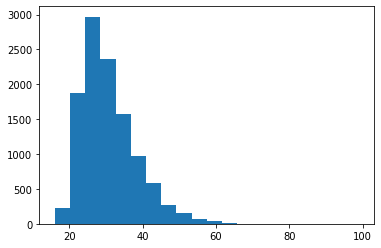

In [50]:
# your code goes here
plt.hist(df['Age'], bins = 20)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


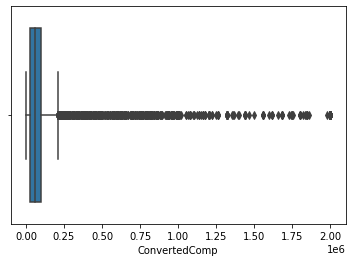

In [51]:
# your code goes here
sns.boxplot(df['ConvertedComp'])

In [52]:
df['ConvertedComp'].median()

57745.0

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [53]:
# your code goes here
q1 = df['ConvertedComp'].quantile(.25)
q3 = df['ConvertedComp'].quantile(.75)

iqr = q3 - q1

print("Iqr is : ", iqr)

Iqr is :  73132.0


Find out the upper and lower bounds.


In [54]:
# your code goes here
upper_band = q3 + 1.5 * iqr
lower_band = q1 -  1.5 * iqr 
print(lower_band, upper_band)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [55]:
# your code goes here
outlier = df[df['ConvertedComp'] < lower_band] | df[df['ConvertedComp'] > upper_band]
len(outlier)

879

In [56]:
boolList = ~((df['ConvertedComp'] < lower_band) | (df['ConvertedComp'] > upper_band))

In [57]:
boolList.head()

0     True
1     True
2     True
3    False
4     True
Name: ConvertedComp, dtype: bool

In [58]:
boolList = ~((df['ConvertedComp'] < (lower_band)) |(df['ConvertedComp'] > (upper_band)))

In [59]:
len(boolList == True)

11398

In [60]:
df_new = df['ConvertedComp'].clip(lower = lower_band, upper = upper_band, axis = 0)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
dataset_cleared_iqr = df[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_cleared_iqr

In [61]:
# your code goes here
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,...,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,...,DynamoDB;PostgreSQL;SQLite,PostgreSQL;Redis;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,AWS;Docker;Heroku;Linux;MacOS;Slack;Other(s):,Express;Ruby on Rails;Other(s):,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,NaN,23.0

In [64]:
dataset = df

In [65]:
Q1=dataset.quantile(0.25)
Q3=dataset.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Respondent       12520.5
CompTotal        95000.0
ConvertedComp    73132.0
WorkWeekHrs          3.0
CodeRevHrs           3.0
Age                 10.0
dtype: float64


In [70]:
df_clear_iqr = df[~((df['CompTotal'] < lower_band) | df['CompTotal'] > upper_band)]
df_clear_iqr.shape

(11398, 85)

In [82]:
df.CompTotal.isnull().sum()

809

In [76]:
df['CompTotal'].dtypes

dtype('float64')

In [80]:
df_1 = df['CompTotal'].clip(lower= lower_band, upper= upper_band, axis = 0)
df_1

0         61000.0
1        138000.0
2         90000.0
3         29000.0
4         90000.0
           ...   
11393    130000.0
11394     74400.0
11395    105000.0
11396     80000.0
11397         NaN
Name: CompTotal, Length: 11398, dtype: float64

In [84]:
df_1.isnull().sum()

809

In [86]:
df_1.median()

65000.0

In [ ]:
df_1.med

In [81]:
len(df_1)

11398

In [66]:
dataset_cleared_iqr = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_cleared_iqr

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,3-4 years ago,Complete a take-home project;Interview with pe...,Yes,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,90000.0,Yearly,90000.0,40.0,There is a schedule and/or spec (made by me or...,"Meetings;Non-work commitments (parenting, scho...",All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",5.0,...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Express;Vue.js,Node.js;Xamarin,Node.js;TensorFlow,Vim;Visual Studio;Visual Studio Code;Xcode,Windows,Development;Testing;Production,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,Yes,Yes,Twitter,In real life (in person),Username,2011,Multiple times per day,Find answers to specific questions,More than 10 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,20 to 99 employees,"Developer, back-end;Developer, front-end;Devel...",5,18,2,Slightly satisfied,Neither satisfied nor dissatisfied,Somewhat confident,No,No,I am actively looking for a job,Less than a year ago,Complete a take-home project;Interview with pe...,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,AUD,Australian dollar,90000.0,Yearly,65277.0,45.0,There's no schedule or spec; I work on what se...,Distracting work environment;Meetings;Time spe...,A few days each month,"Other place, such as a coworking space or cafe",A little above average,"Yes, because I see value in code review",5.0,...,MongoDB;PostgreSQL,Elasticsearch;Firebase;MongoDB;PostgreSQL,Arduino;Docker;Heroku;Raspberry Pi;WordPress,Docker,Angular/Angular.js;Express;Spring,Angular/Angular.js;Express;React.js;Spring;Vue.js,Node.js,Node.js;React Native,IntelliJ;Visual Studio Code,Linux-based,Development;Testing;Production;Outside of work...,Not a

In [68]:
df.shape

(11398, 85)

In [69]:
dataset_cleared_iqr.shape

(6465, 85)

In [87]:
Converted_comp_outlier_removed = df['ConvertedComp'].clip(lower_band, upper_band)

In [88]:
Converted_comp_outlier_removed.median()

57745.0

In [90]:
df_clipped = df['ConvertedComp'].clip(lower_band, upper_band)

In [93]:
df_clipped.median()

57745.0

## Correlation


### Finding correlation


In [94]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

Find the correlation between `Age` and all other numerical columns.


In [96]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
